In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.datasets as dsets
from skimage import transform
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd;
import numpy as np;
from torch.utils.data import Dataset, DataLoader
# from vis_utils import *
import random
import h5py
import math
import torch.nn.functional as F

In [2]:
# Hyperparameters
num_epochs = 2
num_classes = 10
batch_size = 1
learning_rate = 0.001

DATA_PATH = 'MNIST'
MODEL_STORE_PATH = 'pytorch_model\\'

In [3]:
# transforms to apply to the data
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)

Processing...
Done!


In [4]:
# transforms to apply to the data
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)

In [5]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(16384, 1000)
#         self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 1)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
#         print('shape, before fc1', out.shape)
        out = self.fc1(out)
#         out = self.fc2(out)
        out = F.relu(self.fc2(out))
        return out

In [7]:
model = ConvNet()

# Loss and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()  # this is for regression mean squared loss

In [8]:
# # Train the model
# total_step = len(train_loader)
# loss_list = []
# acc_list = []
# for epoch in range(num_epochs):
#     for i, (images, labels) in enumerate(train_loader):
#         # Run the forward pass
#         print(images.shape)
#         images = Variable(images.float())
#         print(images.shape)
#         print(images.type)
#         labels = Variable(labels)
#         print('labels')
#         print(labels)
#         print(labels.shape)
#         outputs = model(images)
#         loss = loss_func(outputs, labels)
#         loss_list.append(loss.item())

#         # Backprop and perform Adam optimisation
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         # Track the accuracy
#         total = labels.size(0)
#         _, predicted = torch.max(outputs.data, 1)
#         correct = (predicted == labels).sum().item()
#         acc_list.append(correct / total)

#         if (i + 1) % 100 == 0:
#             print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
#                   .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
#                           (correct / total) * 100))

In [9]:
# print('Here is the size of the input images:', images.shape)
# print('Here is the size of the outputs:', outputs.shape)

In [10]:
import matplotlib.pyplot as plt
from PIL import Image


# plt.imshow(IMAGE)
# plt.show()

In [11]:
number_brains_train = 100
brains = []
for i in range(1, 1+number_brains_train):
    with h5py.File('../Brains/%s.mat' %i, 'r') as f:
#         print(list(f.keys()))
#         print(list(f['cjdata'].keys()))
        brain = np.array(f['cjdata']['image'])
        brain = brain[::8, ::8]
        brains += [brain]

# columns = 2
# rows = 5

# fig=plt.figure(figsize=(20, 20))
# for i in range(1, 11):
#     brain = brains[i-1]
#     fig.add_subplot(rows, columns, i)
#     plt.imshow(brain)
# plt.show()


In [12]:
resulting_brains = []
vars_ = []
number_brains_blurried = 10

for l in range(len(brains)):
    test_brain = brains[l]/1000
    resulting_brains.append(test_brain)
    vars_.append(0)
    for i in range(number_brains_blurried):
        var = 0
        changed_brain = np.copy(test_brain)
        for j in range(64):
            for k in range(64):
                value = changed_brain[k][j]
                add = np.random.randint(max(-value, -1000+100*i), 1000-100*i)/1000
                #print(changed_brain[k][j])
                changed_brain[k][j] = value + add
                #print(changed_brain[k][j])

                var = var + add/1000
        resulting_brains.append(changed_brain)
        vars_.append(var)

In [13]:
print(len(vars_))
print(len(resulting_brains))

print((test_brain/1000)[32][32])

1100
1100
0.001454


In [14]:
# labels_ = np.random.randint(1, 10, 10).reshape(10, 1)
# print(np.array(brains).shape)
# brains = np.array(brains).reshape(10, 1, 64, 64)
# print(labels_.shape, brains.shape)
# print(labels_)

vars_ = np.array(vars_).reshape(number_brains_train*(number_brains_blurried+1), 1)
resulting_brains = np.array(resulting_brains).reshape(number_brains_train*(number_brains_blurried+1), 1, 64, 64)

print(vars_.shape[0], vars_.shape)

1100 (1100, 1)


In [15]:
# Train the model
total_step = vars_.shape[0]
loss_list = []
acc_list = []
for epoch in range(num_epochs):
#     for i, (images, labels) in enumerate(train_loader):
#         # Run the forward pass
#         images = Variable(images.float())
#         labels = Variable(labels)
#         outputs = model(images)
    for i in range(vars_.shape[0]):
        images = torch.from_numpy(resulting_brains[i].reshape(1, 1, 64, 64))
        images = Variable(images.float())

        labels = torch.from_numpy(vars_[i])
#         labels = Variable(labels.float())
#         labels = labels.float()
        outputs = model(images)
#         print('Out:', outputs)
#         print('Lab:', labels)
        loss = criterion(outputs, labels.float())
#         print('Loss:', loss)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()

#         # Track the accuracy
#         total = labels.size(0)
#         _, predicted = torch.max(outputs.data, 1)
#         correct = (predicted == labels).sum().item()
#         acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

Epoch [1/2], Step [100/1100], Loss: 0.3288
Epoch [1/2], Step [200/1100], Loss: 0.3749
Epoch [1/2], Step [300/1100], Loss: 0.0549
Epoch [1/2], Step [400/1100], Loss: 0.0930
Epoch [1/2], Step [500/1100], Loss: 0.0420
Epoch [1/2], Step [600/1100], Loss: 0.0246
Epoch [1/2], Step [700/1100], Loss: 0.0000
Epoch [1/2], Step [800/1100], Loss: 0.0055
Epoch [1/2], Step [900/1100], Loss: 0.0515
Epoch [1/2], Step [1000/1100], Loss: 0.0005
Epoch [1/2], Step [1100/1100], Loss: 0.0994
Epoch [2/2], Step [100/1100], Loss: 0.0411
Epoch [2/2], Step [200/1100], Loss: 0.0289
Epoch [2/2], Step [300/1100], Loss: 0.0306
Epoch [2/2], Step [400/1100], Loss: 0.0071
Epoch [2/2], Step [500/1100], Loss: 0.1171
Epoch [2/2], Step [600/1100], Loss: 0.0006
Epoch [2/2], Step [700/1100], Loss: 0.0001
Epoch [2/2], Step [800/1100], Loss: 0.0187
Epoch [2/2], Step [900/1100], Loss: 0.0439
Epoch [2/2], Step [1000/1100], Loss: 0.0009
Epoch [2/2], Step [1100/1100], Loss: 0.0167


In [16]:
resulting_brains_test = []
vars_test= []

brains_test = []
for i in range(len(brains), len(brains)+10):
    with h5py.File('../Brains/%s.mat' %i, 'r') as f:
#         print(list(f.keys()))
#         print(list(f['cjdata'].keys()))
        brain = np.array(f['cjdata']['image'])
        brain = brain[::8, ::8]
        brains_test += [brain]

for l in range(len(brains_test)):
    test_brain = brains_test[l]/1000
    resulting_brains_test.append(test_brain)
    vars_test.append(0)
    for i in range(10):
        var = 0
        changed_brain = np.copy(test_brain)
        for j in range(64):
            for k in range(64):
                value = changed_brain[k][j]
                add = np.random.randint(max(-value, -1000+100*i), 1000-100*i)/1000
                #print(changed_brain[k][j])
                changed_brain[k][j] = value + add
                #print(changed_brain[k][j])

                var = var + add/1000
        resulting_brains_test.append(changed_brain)
        vars_test.append(var)

In [17]:
# Test the model
model.eval()
with torch.no_grad():
#     for images, labels in test_loader:
   for i in range(len(vars_test)):
        images = torch.from_numpy(resulting_brains_test[i].reshape(1, 1, 64, 64))
        images = Variable(images.float())
        outputs = model(images)
          
        print('OUT', outputs.data[0][0], 'REAL', vars_test[i])

OUT tensor(0.1301) REAL 0
OUT tensor(1.8057) REAL 1.9930359999999991
OUT tensor(1.6535) REAL 1.863992999999999
OUT tensor(1.4577) REAL 1.6262969999999954
OUT tensor(1.2707) REAL 1.4435600000000008
OUT tensor(1.0702) REAL 1.2258549999999997
OUT tensor(0.9045) REAL 1.0263440000000008
OUT tensor(0.7217) REAL 0.8181900000000005
OUT tensor(0.5394) REAL 0.6080530000000006
OUT tensor(0.3819) REAL 0.41228499999999907
OUT tensor(0.2367) REAL 0.20001200000000102
OUT tensor(0.1735) REAL 0
OUT tensor(1.8886) REAL 2.051161000000005
OUT tensor(1.6667) REAL 1.8556510000000008
OUT tensor(1.4847) REAL 1.637795999999997
OUT tensor(1.3230) REAL 1.4244410000000005
OUT tensor(1.1362) REAL 1.230541000000003
OUT tensor(0.9391) REAL 1.020241999999999
OUT tensor(0.7687) REAL 0.8197749999999995
OUT tensor(0.5908) REAL 0.6073859999999999
OUT tensor(0.4218) REAL 0.4096370000000003
OUT tensor(0.2827) REAL 0.199753000000001
OUT tensor(0.2144) REAL 0
OUT tensor(1.9166) REAL 2.042076999999997
OUT tensor(1.7553) REAL 

In [18]:
test_input = resulting_brains_test[5]
test_input = torch.from_numpy(test_input.reshape(1, 1, 64, 64))
# test_input.requires_grad = True
# print()
test_input = Variable(test_input.float(), requires_grad=True)
test_output = model(test_input)  
test_output.backward(retain_graph=True)
print(test_output)
# test_output = Variable(test_output, requires_grad=True)
# test_output.requires_grad = True
print(test_output)
print(test_input)
d = torch.autograd.grad(test_output, test_input, allow_unused=True)
print(d)

tensor([[1.0702]], grad_fn=<ReluBackward0>)
tensor([[1.0702]], grad_fn=<ReluBackward0>)
tensor([[[[0.4740, 0.2880, 0.2580,  ..., 0.1320, 0.3230, 0.5570],
          [0.5440, 0.1980, 0.2510,  ..., 0.4250, 0.1070, 0.5490],
          [0.1140, 0.4980, 0.1850,  ..., 0.3090, 0.3910, 0.3130],
          ...,
          [0.1830, 0.5200, 0.4660,  ..., 0.4280, 0.2630, 0.2970],
          [0.2250, 0.5750, 0.4790,  ..., 0.3520, 0.4760, 0.0240],
          [0.5610, 0.0970, 0.3480,  ..., 0.5670, 0.2190, 0.3530]]]],
       requires_grad=True)
(tensor([[[[ 1.0087e-03, -1.0508e-03, -4.2350e-04,  ..., -2.7500e-04,
            2.6037e-04,  5.0147e-04],
          [ 1.8726e-03, -5.6468e-04, -2.3130e-04,  ...,  1.1668e-03,
            2.1763e-04,  9.2617e-04],
          [-1.1251e-03,  1.1864e-03, -1.8529e-04,  ...,  1.7876e-03,
            1.6513e-03,  4.9165e-04],
          ...,
          [-6.2724e-04,  2.5837e-03,  1.2068e-03,  ...,  1.8122e-03,
            1.0084e-03, -8.4037e-04],
          [-8.7569e-04,  1.

In [19]:
print(d[0].shape)

torch.Size([1, 1, 64, 64])


In [20]:
# m = nn.Linear(2, 1)
# inputa = torch.ones(1, 2)
# inputa.requires_grad = True
# output = m(inputa).sum()
# output.backward(retain_graph=True)
# print(inputa.grad.data)

# print('INPUT:')
# print(inputa)
# print('OUTPUT:')
# print(output)
# print('LINEAR:')
# print(m)
# print('F(INPUT):', m(inputa))

In [21]:
# print(m.weight)
# print(torch.autograd.grad(output, inputa))

In [22]:
# test_input = resulting_brains_test[0]
# test_input = torch.from_numpy(test_input.reshape(1, 1, 64, 64))
# # test_input.requires_grad = True
# # print()
# test_input = Variable(test_input.float())
# test_output = model(test_input)  
# test_output.backward()
# print(test_output)
# # test_output.requires_grad = True

In [23]:
# print(test_input)

In [24]:
# d = torch.autograd.grad(test_output, test_input)

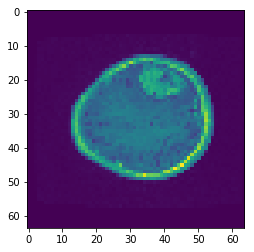

In [25]:
# GRADIENT DESCENT

with h5py.File('../Brains/%s.mat' %i, 'r') as f:
    brain = np.array(f['cjdata']['image'])
    brain = brain[::8, ::8]
    image_to_reconstruct = brain

plt.imshow(image_to_reconstruct)
plt.show()

In [26]:
import scipy.io
mat_90 = scipy.io.loadmat('thinL64_90')
print(mat_90['H'].todense())
print(mat_90['H'].todense().shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(8100, 4096)


In [27]:
A_90 = mat_90['H'].todense()
print(A_90.shape)

(8100, 4096)


In [28]:
p_90 = np.transpose(np.matmul(A_90, image_to_reconstruct.flatten()))

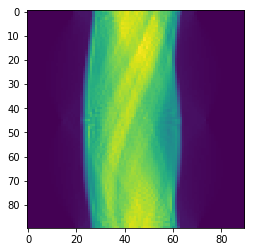

In [29]:
plt.imshow(p_90.reshape(90, 90))    
plt.show()

In [30]:
def f(x):
    global A_90
    p = np.transpose(np.matmul(A_90, np.transpose(x.flatten())))
    return p.reshape(90, 90)

def cost_function(x, y):
    return np.linalg.norm(f(x)-y.reshape(90, 90))
    
def grad_cost_function(x, y):
    global A_90
    U1 = np.matmul(np.transpose(A_90), np.transpose(f(x).flatten()))
#     print(y.flatten().shape)
    U2 = np.matmul(np.transpose(A_90), np.transpose(y.flatten()))
#     return (np.dot(np.transpose(A), f(x)) - np.dot(np.transpose(A), y))
    return U1.reshape(64, 64) - U2.reshape(64, 64)


In [36]:
nn_importance = 1000

def f(x):
    global A_90
    p = np.transpose(np.matmul(A_90, np.transpose(x.flatten())))
    return p.reshape(90, 90)

def cost_function_nn(x, y, nn_importance):
#     global nn_importance
    nn_input = torch.from_numpy((x/1000).reshape(1, 1, 64, 64))
#     print(nn_input.view(1, 1, 64, 64).shape)
    nn_input = Variable(nn_input.float(), requires_grad=True)
    nn_output = model(nn_input.view(1, 1, 64, 64))
#     print('xxx')
#     print(np.linalg.norm(f(x)-y.reshape(90, 90)))
#     print(nn_importance * nn_output[0][0])
#     print('xxx')
    return np.linalg.norm(f(x)-y.reshape(90, 90)) + nn_importance * nn_output[0][0]
    
def grad_cost_function_nn(x, y, nn_importance):
    global A_90
#     global nn_importance
    U1 = np.matmul(np.transpose(A_90), np.transpose(f(x).flatten()))
#     print(y.flatten().shape)
    U2 = np.matmul(np.transpose(A_90), np.transpose(y.flatten()))
#     return (np.dot(np.transpose(A), f(x)) - np.dot(np.transpose(A), y))

    nn_input = torch.from_numpy((x/1000).reshape(1, 1, 64, 64))
    nn_input = Variable(nn_input.float(), requires_grad=True)
    nn_output = model(nn_input.view(1, 1, 64, 64))
    nn_output.backward(retain_graph=True)
    d = torch.autograd.grad(nn_output, nn_input, allow_unused=True)
#     print(d[0].shape)
    if d[0].shape == torch.Size([1, 1, 64, 64]):
        d = d[0][0][0]
    else:
        d = d[0]
    return U1.reshape(64, 64) - U2.reshape(64, 64) + nn_importance * d.numpy()


In [43]:
itr = 10001
lr = 0.00001
cur_x_nn = np.random.rand(64, 64)
cur_x = np.random.rand(64, 64)


for i in range(itr+1):
    
    nn_importance = i**2
    
    prev_x_nn = cur_x_nn
    prev_x = cur_x
    
    r_nn = grad_cost_function_nn(prev_x_nn, p_90, nn_importance)
    r = grad_cost_function(prev_x, p_90)
#     grad_rec = grad_cost_function(prev_x, p_90)
    
    cur_x = cur_x - lr * r
    cur_x_nn = cur_x_nn - lr * r
    
    
    if i%100 == 0:
        print('___________________________')
        print(cost_function_nn(cur_x_nn, p_90, nn_importance))
        print(cost_function(cur_x, p_90))
        print(i / ( itr - 1 ) * 100, '% done')
        # print(cur_x - original_list[color])

___________________________
tensor(1968910.5000, grad_fn=<AddBackward0>)
1968852.6590856966
0.0 % done
___________________________
tensor(302993.1875, grad_fn=<AddBackward0>)
300788.19452587457
1.0 % done
___________________________
tensor(174612.2969, grad_fn=<AddBackward0>)
170038.55433111527
2.0 % done
___________________________
tensor(132094.3281, grad_fn=<AddBackward0>)
124760.6364143206
3.0 % done
___________________________
tensor(109579.4922, grad_fn=<AddBackward0>)
98906.01800658344
4.0 % done
___________________________
tensor(95731.3672, grad_fn=<AddBackward0>)
81279.54454890001
5.0 % done
___________________________
tensor(86823.5703, grad_fn=<AddBackward0>)
68362.57935196515
6.0 % done
___________________________
tensor(81078.2812, grad_fn=<AddBackward0>)
58491.08948203463
7.000000000000001 % done
___________________________
tensor(77368., grad_fn=<AddBackward0>)
50728.749327792706
8.0 % done
___________________________
tensor(74868.6875, grad_fn=<AddBackward0>)
44494.352

KeyboardInterrupt: 

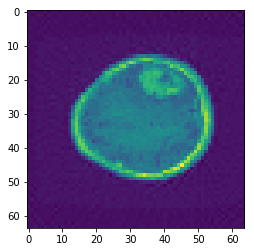

In [44]:
plt.imshow(cur_x.reshape(64, 64))
plt.show()

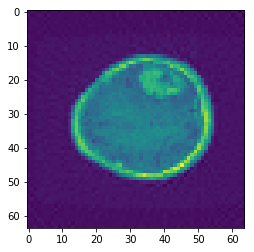

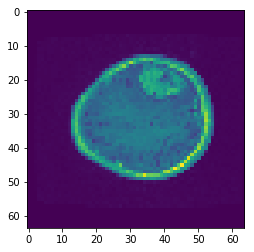

In [45]:
plt.imshow(cur_x_nn.reshape(64, 64))
plt.show()
plt.imshow(image_to_reconstruct)
plt.show()

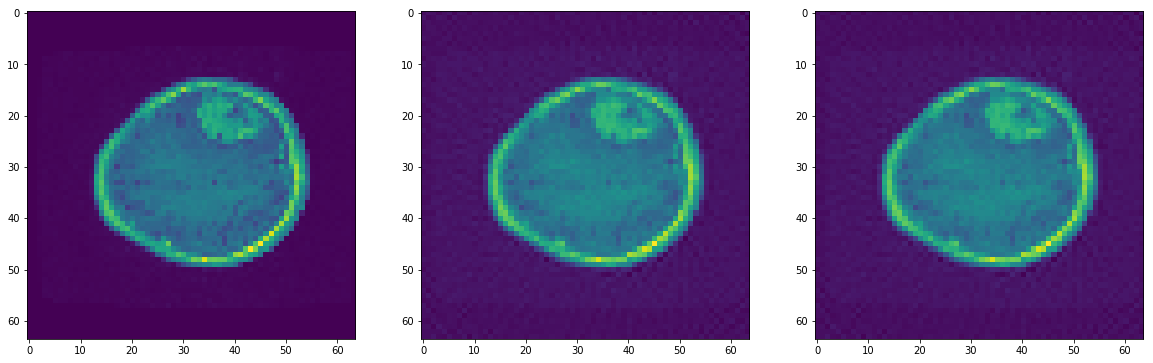

In [46]:
fig=plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(image_to_reconstruct)
fig.add_subplot(1, 3, 2)
plt.imshow(cur_x)
fig.add_subplot(1, 3, 3)
plt.imshow(cur_x_nn)
plt.show()

In [47]:
print(cur_x[0])
print(cur_x_nn[0])

[[-15.78019581  25.63570424  11.53418534 -34.69615488   2.81354951
   43.38264077 -52.83104285  22.81353213  19.28566699 -48.12096927
   26.18182588  -4.94541826 -13.6576838   -0.18465799  25.63281402
   -3.72524153   4.30228436 -16.60850164 -29.39816144  32.03773955
    9.86104507 -24.12715308  21.2145787    3.94526016 -16.54637158
  -12.9927779   30.125064   -17.05257028   4.57791287  31.65162631
  -18.62921629  -7.55277057   0.98568749  15.58603235 -10.64790681
    7.39154682   8.87613244  -2.9605099  -26.19653429  14.53090274
   27.46657306  -9.30749818  25.6088468  -56.7480867   39.69174146
  -58.15904479  30.68299873  -6.10904015  12.07242822   6.577651
  -34.74122001  16.70248755   8.84184585 -15.98770204   8.41729593
    0.66011847   5.88492597  27.89479808 -25.46206284 -34.49555908
   45.94661473  34.75429121 -96.56970856  64.27393238]]
[[-16.32057349  26.01064255  11.62203594 -34.49441392   3.44762059
   43.13903947 -53.59885861  23.21917294  18.53819454 -48.11158386
   26.94